In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import scipy.stats as stats

In [2]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [3]:
df_national_official = pd.read_csv('data/national_cdc_pandas_df.csv', index_col=0)

In [4]:
df_states_official = pd.read_csv('data/states_cdc_pandas_df.csv', index_col=0)

In [37]:
df_covid_states = pd.read_csv('data/states_covid_pandas_df.csv', index_col=0)

In [5]:
#Create List of Weeks 1-11
week_labels = list(df_national_official['Week'].unique())
week_labels.sort()
weeks_to_9 = week_labels[:9]
weeks_to_10 = week_labels[:10]
weeks_to_11 = week_labels[:11]
weeks_to_12 = week_labels[:12]

In [6]:
#Create List of Yrs 2014-2020
years = list(df_national_official['Calendar_year'].unique())
years.sort()
years = years[1:]

#### Create Lists of both Sample Statistics: Avg Death Rate & Avg PI % of all Deaths. Want to compare 2020 to 2019 and 2020 to 2014-2019

In [7]:
dr_2020 = []
dr_2019 = []
dr_2014_19 = []

dr_2020_v2 = []
dr_2019_v2 = []
dr_2014_19_v2 = []

dr_2020_v3 = []
dr_2019_v3 = []
dr_2014_19_v3 = []

pi_2020 = []
pi_2019 = []
pi_2014_19 = []

#Adding in Week 12, despite low percent completeness to get Pneumonia & Influenza data since it is % of Dead
pi_2020_v2 = []
pi_2019_v2 = []
pi_2014_19_v2 = []

In [8]:
for week in weeks_to_11:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            dr_2020.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2020.append(round(df['Percent_p_i'].iloc[0],4))
        elif year == 2019:
            dr_2019.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2019.append(round(df['Percent_p_i'].iloc[0],4))
            dr_2014_19.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2014_19.append(round(df['Percent_p_i'].iloc[0],4))
        else:
            dr_2014_19.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2014_19.append(round(df['Percent_p_i'].iloc[0],4))

In [9]:
for week in weeks_to_12:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            pi_2020_v2.append(round(df['Percent_p_i'].iloc[0],4))
        elif year == 2019:
            pi_2019_v2.append(round(df['Percent_p_i'].iloc[0],4))
            pi_2014_19_v2.append(round(df['Percent_p_i'].iloc[0],4))
        else:
            pi_2014_19_v2.append(round(df['Percent_p_i'].iloc[0],4))

In [10]:
for week in weeks_to_10:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            dr_2020_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        elif year == 2019:
            dr_2019_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
            dr_2014_19_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        else:
            dr_2014_19_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            

In [11]:
for week in weeks_to_9:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            dr_2020_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        elif year == 2019:
            dr_2019_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
            dr_2014_19_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        else:
            dr_2014_19_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            

### Before applying statistical tests, plot box plots to get early idea of what direction you want to test

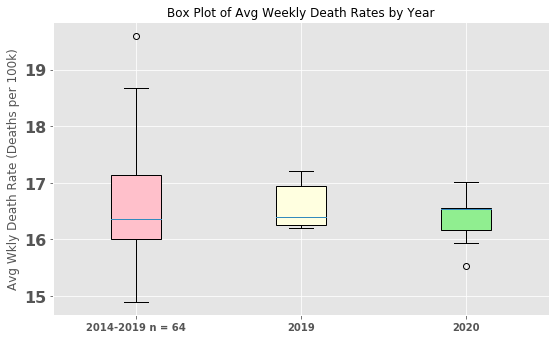

In [186]:
fig, ax = plt.subplots(1, figsize=(8, 5))
bplot = ax.boxplot([dr_2014_19, dr_2019, dr_2020], vert=True, patch_artist=True)
# fill with colors
colors = ['pink', 'lightyellow', 'lightgreen']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

    
ax.set_xticks([1,2,3])
ax.set_xticklabels([f'2014-2019 n = {len(dr_2014_19)}', '2019', '2020'], fontsize = 10)

ax.set_title('Box Plot of Avg Weekly Death Rates by Year',fontsize = 12)
ax.set_ylabel("Avg Wkly Death Rate (Deaths per 100k)", fontsize = 12)
ax.yaxis.grid(True)

plt.tight_layout()

# ax.set_title(f'State: {state}. Weeks of Data: {len(state_dict[state])}',fontsize = 10)

# Look into how to highlight outliers
# Look into how to share titles across multiple plots

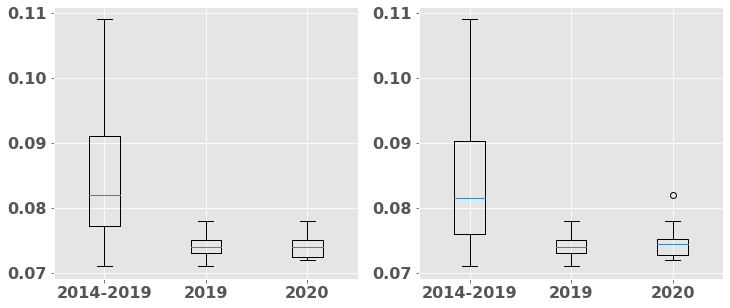

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, ax in enumerate(axs.flatten()):
    if idx == 0:
        ax.boxplot([pi_2014_19, pi_2019, pi_2020])
        ax.set_xticks([1,2,3])
        ax.set_xticklabels(['2014-2019', '2019', '2020'])
#         ax.set_title('Box Plot of Avg Weekly % of Deaths caused by Pneumonia & Influenza',fontsize = 12)
    elif idx == 1:
        ax.boxplot([pi_2014_19_v2, pi_2019_v2, pi_2020_v2])
        ax.set_xticks([1,2,3])
        ax.set_xticklabels(['2014-2019', '2019', '2020']) 
#         axs.set_title('Box Plot of Avg Weekly % of Deaths caused by Pneumonia & Influenza Incl Week 12',fontsize = 12)


### Statistical Tests #1: National Death Rates.  Sample Sizes are 11. Sample Statistic is Mean Weekly Death Rate. Sample size is not larger than 30 and samples are not identically calculated (population changes) nor independent (seasonality). Thus I cannot infer CLT and assum Sample Statistic follows normal Dist.  Therefore, I can do non-parametric tests.  I will still do T-Test as well to just check and potentally bootstrapping

> Null Hypothesis 1: 2019's Death Rate is equaliy likely to be higher than 2020's as the other way around. I.e.
    $P(\text{Die in a week in 2019 > Die in a week in 2020}) = 0.50 $

> Null Hypothesis 2: 2014's Death Rate is equaliy likely to be higher than 2020's as the other way around. I.e.
    $P(\text{Die in a week in 2014-2019 > Die in a week in 2020}) = 0.50 $

> Chosen Alpha: 0.01

### Mann-Whitney Signed Rank Test

In [35]:
#checking two sided test for 2014-2019 vs. 2019
stats.mannwhitneyu(dr_2019, dr_2014_19, alternative="two-sided")


MannwhitneyuResult(statistic=435.0, pvalue=0.29781330458060806)

In [14]:
stats.mannwhitneyu(dr_2019, dr_2020, alternative="greater")


MannwhitneyuResult(statistic=99.0, pvalue=0.006243169566795771)

In [15]:
stats.mannwhitneyu(dr_2014_19, dr_2020, alternative="greater")


MannwhitneyuResult(statistic=562.0, pvalue=0.0019271208503696576)

In [16]:
#test excluding Week 11 - outlier
stats.mannwhitneyu(dr_2019_v2, dr_2020_v2, alternative="greater")


MannwhitneyuResult(statistic=80.0, pvalue=0.012790648078739504)

In [17]:
#test excluding Week 10 and 11
stats.mannwhitneyu(dr_2019_v3, dr_2020_v3, alternative="greater")


MannwhitneyuResult(statistic=63.0, pvalue=0.025908235684109524)

In [18]:
#test excluding Week 11 - outlier
stats.mannwhitneyu(dr_2014_19_v2, dr_2020_v2, alternative="greater")


MannwhitneyuResult(statistic=463.0, pvalue=0.003189596704303478)

In [19]:
#test excluding Week 10 and 11
stats.mannwhitneyu(dr_2014_19_v3, dr_2014_19_v3, alternative="greater")


MannwhitneyuResult(statistic=1458.0, pvalue=0.5012259146992846)

## Welsh T-Test to just see

In [20]:
stats.ttest_ind(dr_2019,dr_2020, equal_var = False)

Ttest_indResult(statistic=3.439862586764269, pvalue=0.006220009268575825)

In [21]:
stats.ttest_ind(dr_2014_19,dr_2020, equal_var = False)

Ttest_indResult(statistic=3.2065012402818165, pvalue=0.007155930036471277)

In [22]:
#test excluding Week 11 - outlier
stats.ttest_ind(dr_2019_v2,dr_2020_v2, equal_var = False)

Ttest_indResult(statistic=3.6334696212141404, pvalue=0.0052423817047300425)

In [23]:
#test excluding Week 11 - outlier
stats.ttest_ind(dr_2014_19_v2,dr_2020_v2, equal_var = False)

Ttest_indResult(statistic=3.435956023077149, pvalue=0.004109491206912265)

### Statistical Tests #2: % of Death due to Influenza & Pneumonia.  Sample Sizes are 11. Sample Statistic is Avg % of Deaths due to Influenza & Pneumonia. Sample size is not larger than 30. One could potentially argue samplesis   identically distributed, but not independent (seasonality). Thus I cannot infer CLT and assum Sample Statistic follows normal Dist.  Therefore, I can do non-parametric tests.  I will still do T-Test as well to just check and potentally bootstrapping

> Null Hypothesis 1: 2020's I&P % of Deaths is equaliy likely to be higher than 2019's as the other way around. I.e.
    $P(\text{Pct Deaths due to Influenza+Pneum in 2020 > Pct Deaths due to Influenza+Pneum in 2019}) = 0.50 $

> Null Hypothesis 1: 2020's I&P % of Deaths is equaliy likely to be higher than 2014-19's as the other way around. I.e.
    $P(\text{Pct Deaths due to Influenza+Pneum in 2020 > Pct Deaths due to Influenza+Pneum in 2014-19}) = 0.50 $


> Chosen Alpha: 0.01

### Mann-Whitney Signed Rank Test

In [24]:
stats.mannwhitneyu(pi_2020, pi_2019, alternative="two-sided")

MannwhitneyuResult(statistic=63.5, pvalue=0.8677016699851804)

In [25]:
stats.mannwhitneyu(pi_2020, pi_2014_19, alternative="two-sided")

MannwhitneyuResult(statistic=91.5, pvalue=7.782386690809188e-05)

In [26]:
#Including Week 12
stats.mannwhitneyu(pi_2020_v2, pi_2019_v2, alternative="two-sided")

MannwhitneyuResult(statistic=79.0, pvalue=0.7033658936618321)

In [27]:
#Including Week 12
stats.mannwhitneyu(pi_2020_v2, pi_2014_19_v2, alternative="two-sided")

MannwhitneyuResult(statistic=145.0, pvalue=0.00024372604605772902)

## Welsh T-Test to just see


In [28]:
stats.ttest_ind(pi_2020,pi_2019, equal_var = False)

Ttest_indResult(statistic=0.10758287072797784, pvalue=0.9154076400969492)

In [29]:
stats.ttest_ind(pi_2020,pi_2014_19, equal_var = False)

Ttest_indResult(statistic=-7.709665439198676, pvalue=4.550662709961921e-11)

In [30]:
stats.ttest_ind(pi_2020_v2,pi_2019_v2, equal_var = False)

Ttest_indResult(statistic=0.6584052983883292, pvalue=0.5179603434165234)

In [36]:
stats.ttest_ind(pi_2020_v2,pi_2014_19_v2, equal_var = False)

Ttest_indResult(statistic=-6.403700020419153, pvalue=2.3757015484990545e-08)

### Now looking at State data to see where I can perform Compelling hypothesis tests

In [39]:
df_covid_states.head()

,State,Date,Week,Calendar_year,Deathincrease,Hospitalizedincrease,Negativeincrease,Positiveincrease,Totaltestresultsincrease
1,Alaska,2020-03-07,10,2020,0.0,0.0,4.0,0.0,4.0
2,Alaska,2020-03-08,11,2020,0.0,0.0,2.0,0.0,2.0
3,Alaska,2020-03-09,11,2020,0.0,0.0,9.0,0.0,9.0
4,Alaska,2020-03-10,11,2020,0.0,0.0,0.0,0.0,0.0
5,Alaska,2020-03-11,11,2020,0.0,0.0,23.0,0.0,23.0


In [60]:
#list of 12 states with most highest COVID Cases
df = df_covid_states.groupby('State').sum()[['Deathincrease','Positiveincrease']].sort_values(by = 'Positiveincrease', ascending = False)

df.iloc[0:12]

,Deathincrease,Positiveincrease
State,,
New York,6268.0,149310.0
New Jersey,1504.0,47436.0
Michigan,959.0,20346.0
Louisiana,652.0,17030.0
California,442.0,16904.0
Massachusetts,433.0,16788.0
Pennsylvania,309.0,16237.0
Florida,309.0,15453.0
Illinois,462.0,15074.0


In [61]:
list_of_states = df.index[0:12]

In [62]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou,Percent_p
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935,0.083524
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304,0.083333
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463,0.092308
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802,0.094340
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880,0.080897


In [102]:
mask =  (df_states_official['Calendar_year'] == 2020) & \
        (df_states_official['State'] == 'New York') & \
        (df_states_official['Percent_complete'] >= .9)

In [103]:
df = df_states_official[mask]

In [104]:
df

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou,Percent_p
12418,2019-20,1,0.093565,23,278,3217,1.0,2020,New York,19385555,16.594831,0.086416
12419,2019-20,2,0.090256,20,269,3202,1.0,2020,New York,19385555,16.517453,0.084010
12420,2019-20,3,0.094935,34,279,3297,1.0,2020,New York,19385555,17.007509,0.084622
12421,2019-20,4,0.093175,20,279,3209,1.0,2020,New York,19385555,16.553563,0.086943
12422,2019-20,5,0.085419,35,238,3196,1.0,2020,New York,19385555,16.486502,0.074468
12423,2019-20,6,0.087933,36,246,3207,1.0,2020,New York,19385555,16.543246,0.076707
12424,2019-20,7,0.087317,26,248,3138,1.0,2020,New York,19385555,16.187311,0.079031
12425,2019-20,8,0.084845,32,230,3088,1.0,2020,New York,19385555,15.929387,0.074482
12426,2019-20,9,0.082969,22,244,3206,1.0,2020,New York,19385555,16.538087,0.076107
12427,2019-20,10,0.091172,31,253,3115,1.0,2020,New York,19385555,16.068666,0.081220


In [96]:
round(df['Deaths_per_hund_thou'].iloc[0],2)
round(df['Percent_p_i'].iloc[0],4)

0.1194

In [123]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou,Percent_p
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413,0.066116
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918,0.066273
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224,0.067560
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794,0.065995
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067,0.067060


In [201]:
def state_sample_statistics(dframe, curr_yr = 2020, starting_yr = 2014, week_end = 12, pct_complete_thresh = 1, state = 'National'):
    
    week_labels = list(dframe['Week'].unique())
    week_labels.sort()
    weeks_lst = week_labels[:week_end]

    years_labels = list(dframe['Calendar_year'].unique())
    years_labels.sort()
    start_index = years_labels.index(starting_yr)
    years_lst = years_labels[start_index:]
    
    dr_curr_yr = []
    dr_last_yr = []
    dr_range = []

    pi_curr_yr = []
    pi_last_yr = []
    pi_range = []
        
    for week in weeks_lst:
        
        for year in years_lst:
            if state == 'National':
                mask = (dframe['Week'] == week) & \
                        (dframe['Calendar_year'] == year) & \
                        (dframe['Percent_complete'] >= pct_complete_thresh)
            else:
                mask = (dframe['Week'] == week) & \
                        (dframe['Calendar_year'] == year) & \
                        (dframe['State'] == state) & \
                        (dframe['Percent_complete'] >= pct_complete_thresh)
            
            df = dframe[mask]
            
            if len(df['Total_deaths']) == 0:
                continue    
            else: 
                if year == curr_yr:
                    dr_curr_yr.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
                    pi_curr_yr.append(round(df['Percent_p_i'].iloc[0],4))
                    
                elif year == curr_yr - 1:
                    
                    dr_last_yr.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
                    pi_last_yr.append(round(df['Percent_p_i'].iloc[0],4))
                    
                    dr_range.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
                    pi_range.append(round(df['Percent_p_i'].iloc[0],4))
                    
                else:
                    dr_range.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
                    pi_range.append(round(df['Percent_p_i'].iloc[0],4))

    return [dr_curr_yr, dr_last_yr, dr_range, pi_curr_yr, pi_last_yr, pi_range]



In [203]:
def box_plots(dframe, curr_yr = 2020, starting_yr = 2014, week_end = 12, pct_complete_thresh = 1, state = 'National'):
    
    dr_curr_yr_lst, dr_prior_yr_lst, dr_range_lst, pi_curr_yr_lst, pi_prior_yr_lst, pi_range_lst = \
        state_sample_statistics(dframe, curr_yr, starting_yr, week_end, pct_complete_thresh, state)
              
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    for idx, ax in enumerate(axs.flatten()):
        curr_year_label = str(curr_yr)
        prior_year_label = str(curr_yr-1)
        range_label = str(starting_yr) + '-' + str(curr_yr-1)
        if idx == 0:

            bplot1 = ax.boxplot([dr_range_lst, dr_prior_yr_lst, dr_curr_yr_lst],
                                 vert=True,
                                 patch_artist=True) 
            ax.set_xticks([1,2,3])
            ax.set_xticklabels([f'{range_label} n={len(dr_range_lst)}', 
                                f'{prior_year_label} n={len(dr_prior_yr_lst)}', 
                                f'{curr_year_label} n ={len(dr_curr_yr_lst)}'])

            ax.set_title(f'{state} Box Plot of Avg Weekly Death Rates by Year',fontsize = 12)
            ax.set_ylabel('Avg Wkly Death Rate (Deaths per 100k)', fontsize = 12)
            
            ax.tick_params(axis = 'x', labelsize = 8)
            ax.tick_params(axis = 'y', labelsize = 8)
           
        elif idx == 1:
            
            bplot2 = ax.boxplot([pi_range_lst, pi_prior_yr_lst, pi_curr_yr_lst],
                                 vert=True,
                                 patch_artist=True)
            ax.set_xticks([1,2,3])
            ax.set_xticklabels([f'{range_label} n={len(pi_range_lst)}', 
                                f'{prior_year_label} n={len(pi_prior_yr_lst)}', 
                                f'{curr_year_label} n ={len(pi_curr_yr_lst)}'])
            
            ax.set_title(f'{state} Box Plot of Avg Weekly % of Deaths from Influenza and Pneumonia',fontsize = 10)
            ax.set_ylabel('Avg Wkly % of Deaths Infl&Pneum. ', fontsize = 10)
           
            ax.tick_params(axis = 'x', labelsize = 8)
            ax.tick_params(axis = 'y', labelsize = 8)
            
    # fill with colors
    colors = ['pink', 'lightyellow', 'lightgreen']
    for bplot in (bplot1, bplot2):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
            
    plt.show()
    plt.tight_layout()


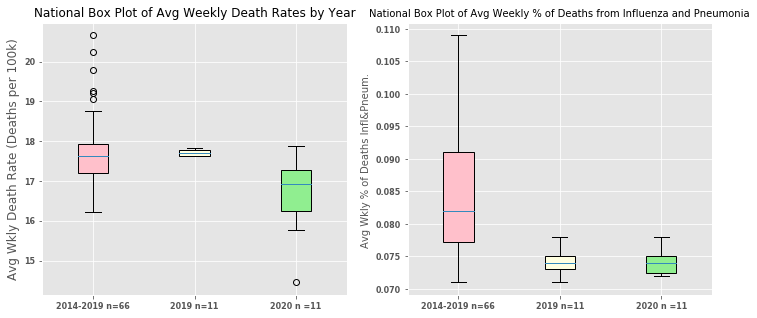

<Figure size 432x288 with 0 Axes>

In [281]:
box_plots(df_national_official, 2020, 2014, 11, 1, state = 'National')

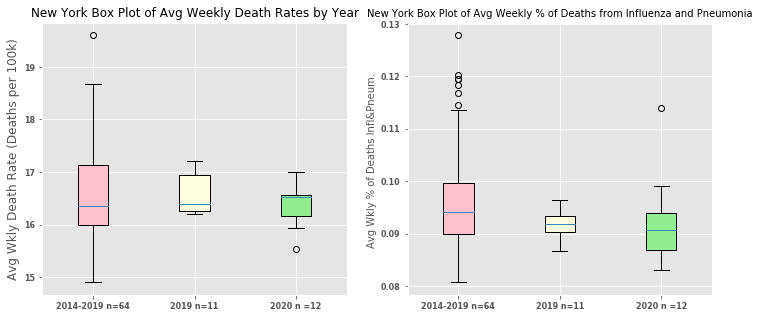

<Figure size 432x288 with 0 Axes>

In [283]:
box_plots(df_states_official, 2020, 2014, 12, 1, state = 'New York')

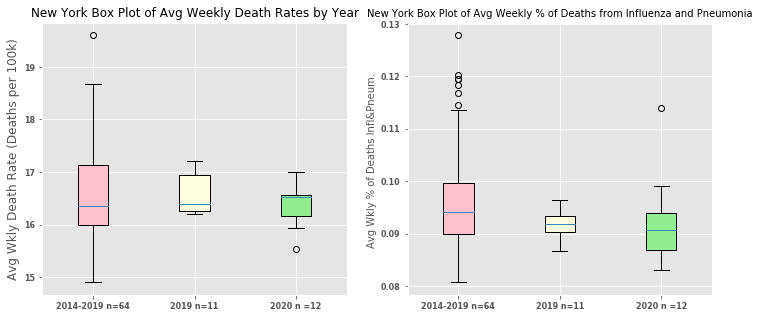

<Figure size 432x288 with 0 Axes>

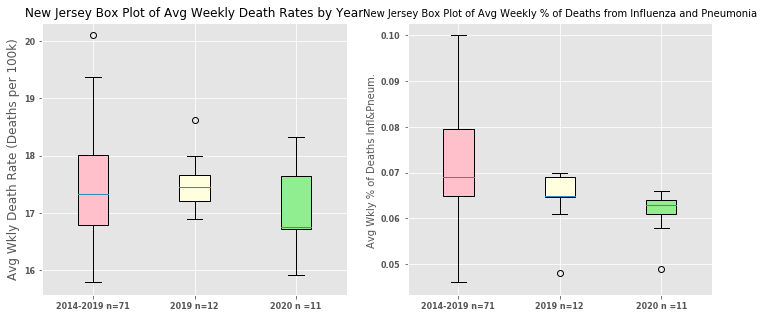

<Figure size 432x288 with 0 Axes>

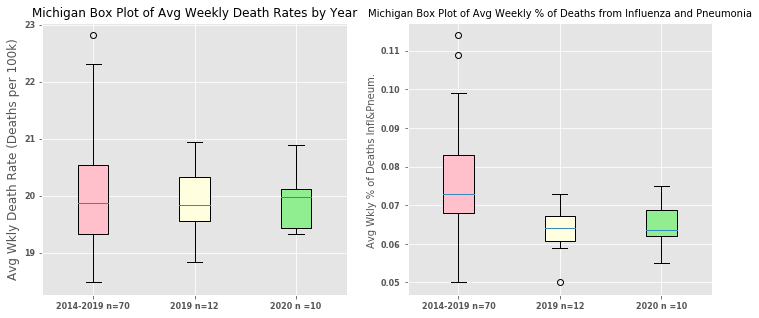

<Figure size 432x288 with 0 Axes>

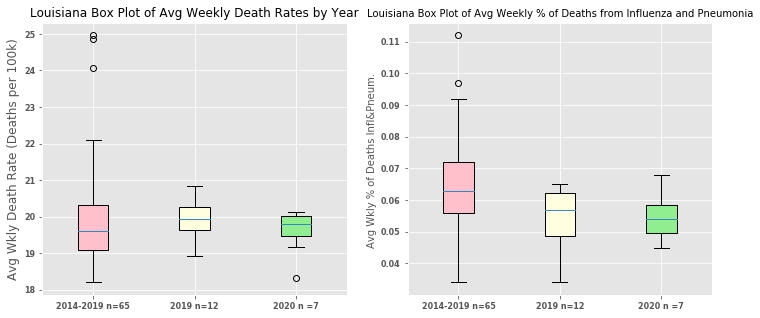

<Figure size 432x288 with 0 Axes>

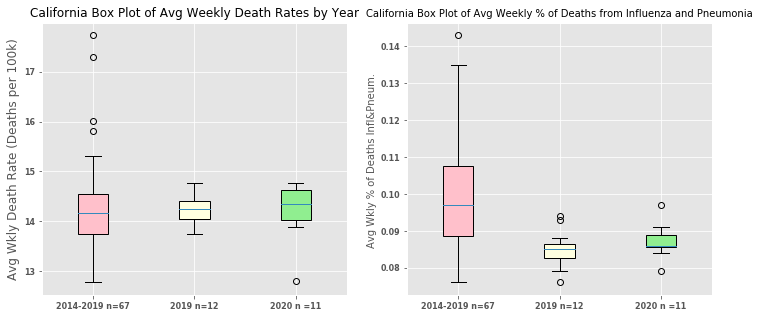

<Figure size 432x288 with 0 Axes>

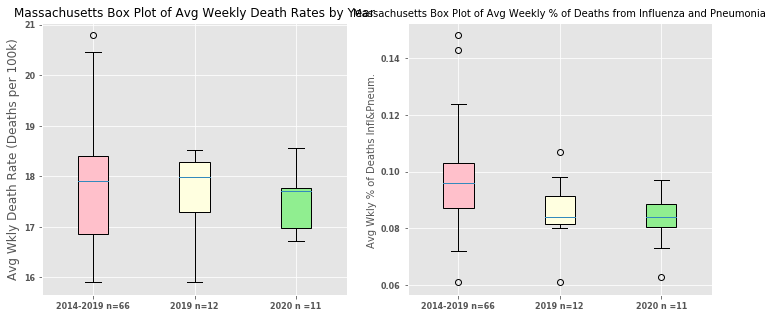

<Figure size 432x288 with 0 Axes>

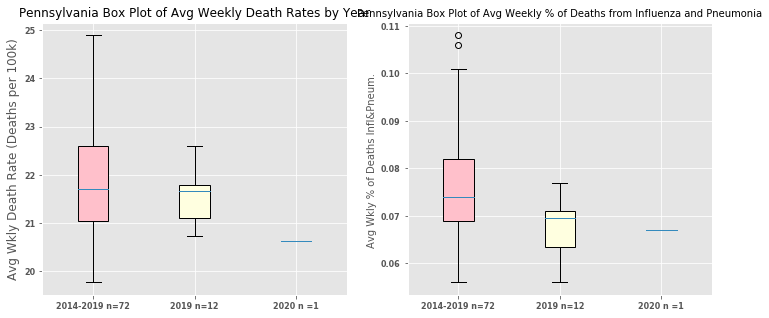

<Figure size 432x288 with 0 Axes>

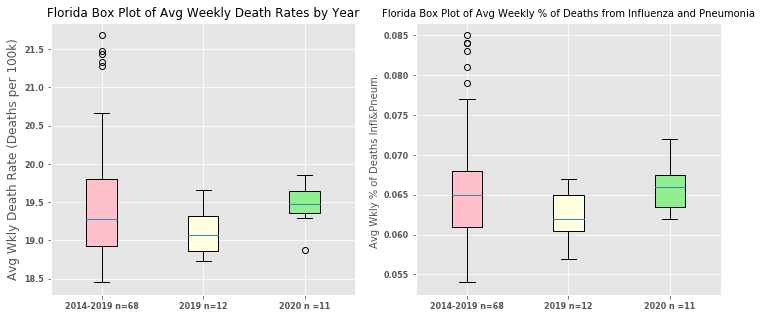

<Figure size 432x288 with 0 Axes>

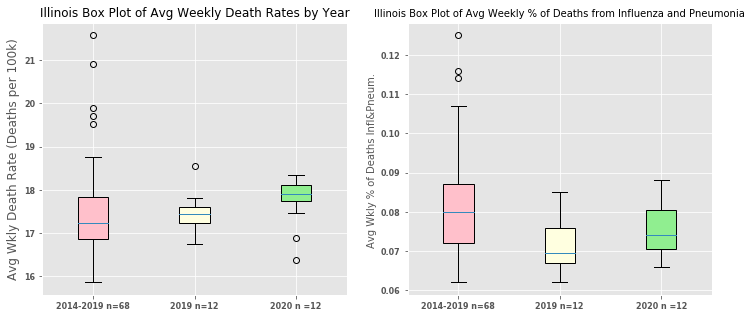

<Figure size 432x288 with 0 Axes>

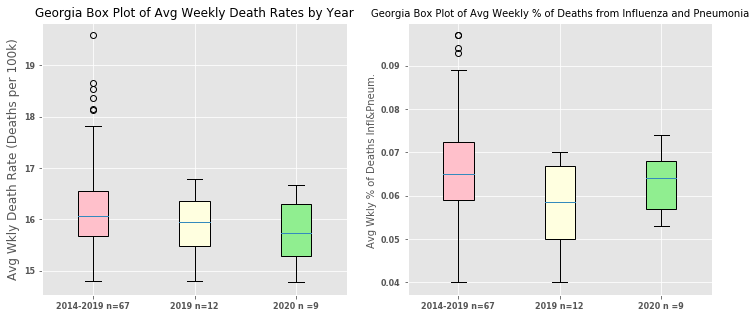

<Figure size 432x288 with 0 Axes>

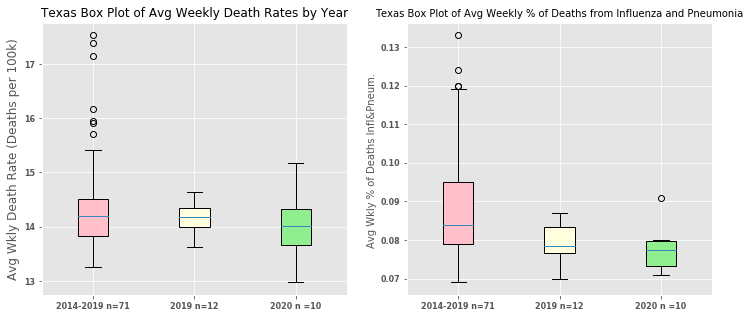

<Figure size 432x288 with 0 Axes>

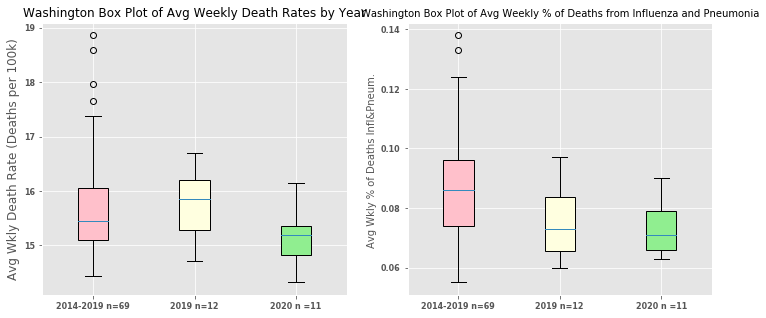

<Figure size 432x288 with 0 Axes>

In [206]:
for state in list_of_states:
    box_plots(df_states_official, 2020, 2014, 12, 1, state = state)

In [263]:
def hypothesis_tests(dframe, curr_yr = 2020, starting_yr = 2014, week_end = 12, pct_complete_thresh = 1, state = 'National'):
    
    dr_curr_yr_lst, dr_prior_yr_lst, dr_range_lst, pi_curr_yr_lst, pi_prior_yr_lst, pi_range_lst = \
        state_sample_statistics(dframe, curr_yr, starting_yr, week_end, pct_complete_thresh, state)
    
    ## Death Rate
    
    if len(dr_curr_yr_lst)>5:
        #non param test to see if avg death rate last year is equal to avg death rate this yr
        _, p_val_dr_mw_yr = stats.mannwhitneyu(dr_prior_yr_lst, dr_curr_yr_lst, alternative="greater")
    
        #non param test to see if avg death rate over range is equal to avg death rate this yr
        _, p_val_dr_mw_range = stats.mannwhitneyu(dr_range_lst, dr_curr_yr_lst, alternative="greater")

        #param test to see if avg death rate over range is equal to avg death rate this yr
        _, p_val_dr_t_yr = stats.ttest_ind(dr_prior_yr_lst, dr_curr_yr_lst, equal_var = False)

        #param test to see if avg death rate over range is equal to avg death rate this yr
        _, p_val_dr_t_range = stats.ttest_ind(dr_range_lst, dr_curr_yr_lst, equal_var = False)


        ## Flu & Pneumonia

        _, p_val_pi_mw_yr = stats.mannwhitneyu(pi_curr_yr_lst, pi_prior_yr_lst, alternative="two-sided")

        #non param test to see if avg death rate over range is equal to avg death rate this yr
        _, p_val_pi_mw_range = stats.mannwhitneyu(pi_curr_yr_lst, pi_range_lst, alternative="two-sided")

        #param test to see if avg death rate over range is equal to avg death rate this yr
        _, p_val_pi_t_yr = stats.ttest_ind(pi_prior_yr_lst, pi_curr_yr_lst, equal_var = False)

        #param test to see if avg death rate over range is equal to avg death rate this yr
        _, p_val_pi_t_range = stats.ttest_ind(pi_range_lst, pi_curr_yr_lst, equal_var = False)
    
        d = {}
        d['state'] = state
        d['samp_size_curr_yr'] = len(dr_curr_yr_lst)
        d['pval_dr_MW_yr'] = '{:2.3f}'.format(p_val_dr_mw_yr)
        d['pval_dr_MW_range'] = '{:2.3f}'.format(p_val_dr_mw_range)
        d['pval_dr_T_yr'] = '{:2.3f}'.format(p_val_dr_t_yr)
        d['pval_dr_T_range'] = '{:2.3f}'.format(p_val_dr_t_range)

        d['pval_pi_MW_yr'] = '{:2.3f}'.format(p_val_pi_mw_yr)
        d['pval_pi_MW_range'] = '{:2.3f}'.format(p_val_pi_mw_range)
        d['pval_pi_T_yr'] = '{:2.3f}'.format(p_val_pi_t_yr)
        d['pval_pi_T_range'] = '{:2.3f}'.format(p_val_pi_t_range)

        return d
    else:
        pass
    

In [264]:
hypothesis_tests(df_states_official, 2020, 2014, 12, 1, state = 'New York')

{'state': 'New York',
 'samp_size_curr_yr': 12,
 'pval_dr_MW_yr': '0.186',
 'pval_dr_MW_range': '0.404',
 'pval_dr_T_yr': '0.235',
 'pval_dr_T_range': '0.321',
 'pval_pi_MW_yr': '0.644',
 'pval_pi_MW_range': '0.120',
 'pval_pi_T_yr': '0.890',
 'pval_pi_T_range': '0.123'}

In [265]:
hypothesis_tests(df_national_official, 2020, 2014, 12, 1)

{'state': 'National',
 'samp_size_curr_yr': 11,
 'pval_dr_MW_yr': '0.006',
 'pval_dr_MW_range': '0.003',
 'pval_dr_T_yr': '0.007',
 'pval_dr_T_range': '0.010',
 'pval_pi_MW_yr': '0.975',
 'pval_pi_MW_range': '0.000',
 'pval_pi_T_yr': '0.985',
 'pval_pi_T_range': '0.000'}

In [279]:
lst_of_states = list(list_of_states)
lst_of_states.append('National')
p_value_dict = []
for state in lst_of_states:
    if state == 'National':
        p_value_dict.append(hypothesis_tests(df_national_official, 2020, 2014, 12, 1))
    else:
        p_value_dict.append(hypothesis_tests(df_states_official, 2020, 2014, 12, 1, state = state))

In [280]:
p_value_dict

[{'state': 'New York',
  'samp_size_curr_yr': 12,
  'pval_dr_MW_yr': '0.186',
  'pval_dr_MW_range': '0.404',
  'pval_dr_T_yr': '0.235',
  'pval_dr_T_range': '0.321',
  'pval_pi_MW_yr': '0.644',
  'pval_pi_MW_range': '0.120',
  'pval_pi_T_yr': '0.890',
  'pval_pi_T_range': '0.123'},
 {'state': 'New Jersey',
  'samp_size_curr_yr': 11,
  'pval_dr_MW_yr': '0.051',
  'pval_dr_MW_range': '0.125',
  'pval_dr_T_yr': '0.097',
  'pval_dr_T_range': '0.147',
  'pval_pi_MW_yr': '0.021',
  'pval_pi_MW_range': '0.000',
  'pval_pi_T_yr': '0.167',
  'pval_pi_T_range': '0.000'},
 {'state': 'Michigan',
  'samp_size_curr_yr': 10,
  'pval_dr_MW_yr': '0.513',
  'pval_dr_MW_range': '0.488',
  'pval_dr_T_yr': '0.861',
  'pval_dr_T_range': '0.615',
  'pval_pi_MW_yr': '0.552',
  'pval_pi_MW_range': '0.004',
  'pval_pi_T_yr': '0.494',
  'pval_pi_T_range': '0.000'},
 {'state': 'Louisiana',
  'samp_size_curr_yr': 7,
  'pval_dr_MW_yr': '0.145',
  'pval_dr_MW_range': '0.425',
  'pval_dr_T_yr': '0.237',
  'pval_dr_T_